# 1. Import necessary libraries 🤖

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

 ✨ _**[np.random.seed(42)](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html): We ensure that every time we run our code, it generates the same random numbers or splits the data in the same way. This is particularly useful when you want to reproduce your results, debug your code, or share your findings with others.**_

# 2.Load and inspect the data 🤖

In [12]:
data = pd.read_csv("heart.csv")

print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [9]:
print(data.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [10]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# 3. Exploratory Data Analysis (EDA) 🤖

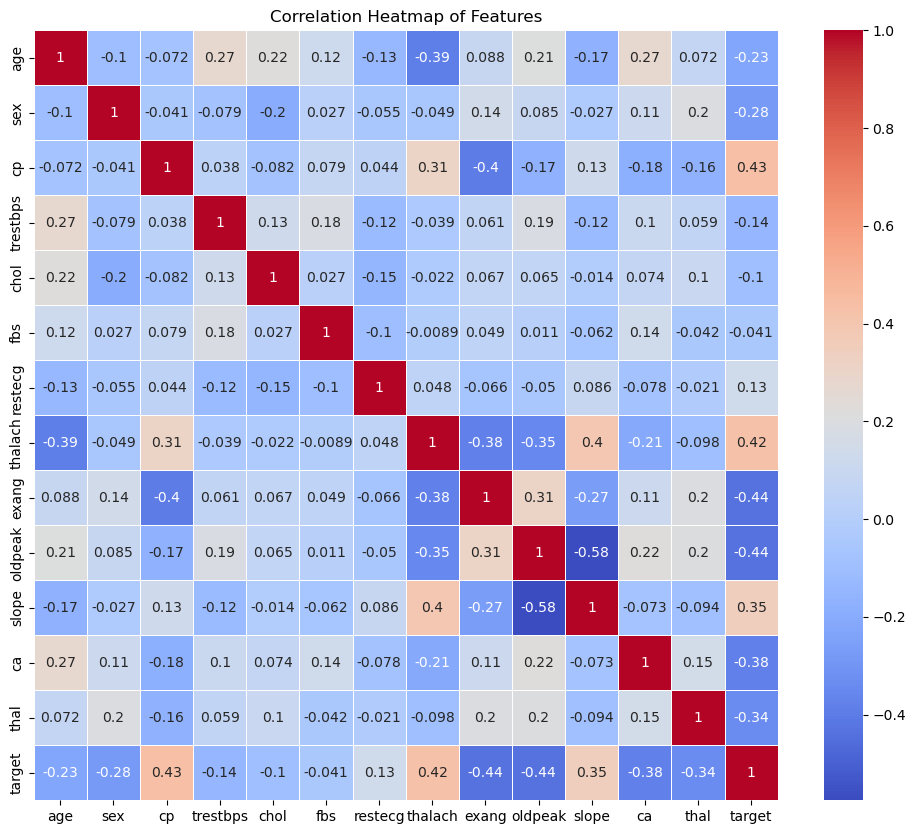

In [13]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

⚡`*Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.*`

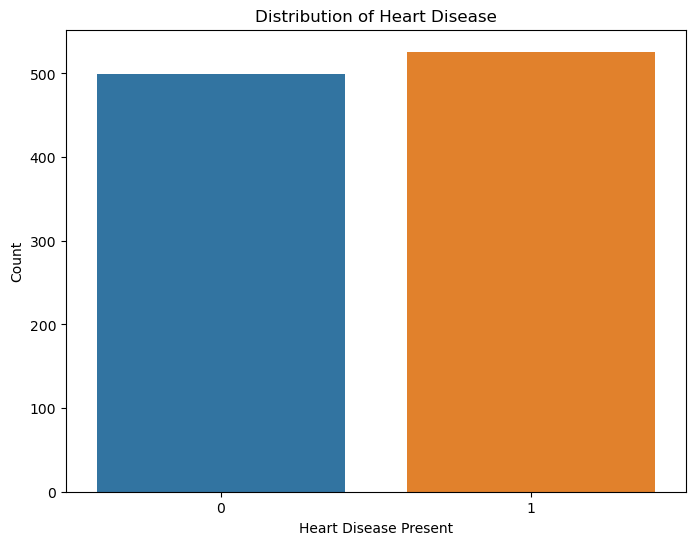

In [14]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease Present')
plt.ylabel('Count')
plt.show()

⚡ `*This is important for identifying potential class imbalance issues, which can affect model performance and guide the choice of evaluation metrics and resampling techniques.*`

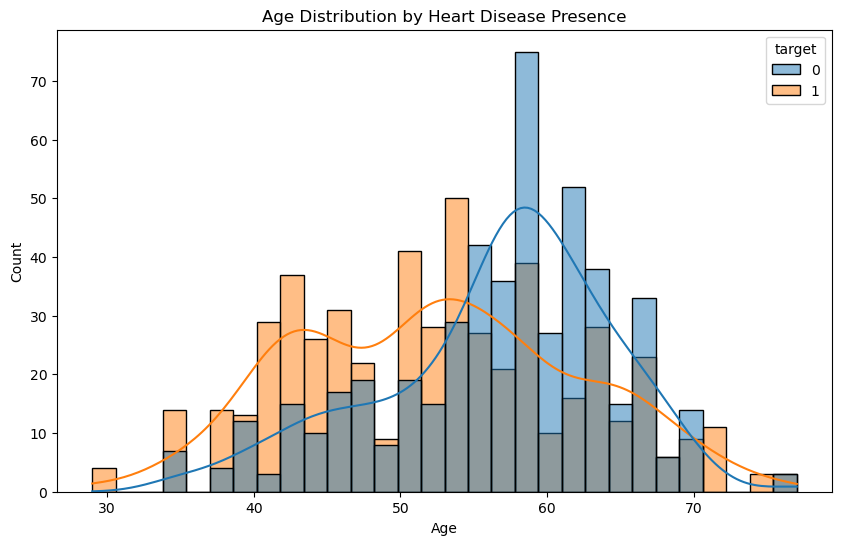

In [15]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='target', kde=True, bins=30)
plt.title('Age Distribution by Heart Disease Presence')
plt.xlabel('Age')
plt.show()

⚡ `*This can reveal insights such as whether certain age groups are more likely to have heart disease, aiding in feature selection and model interpretation.*`

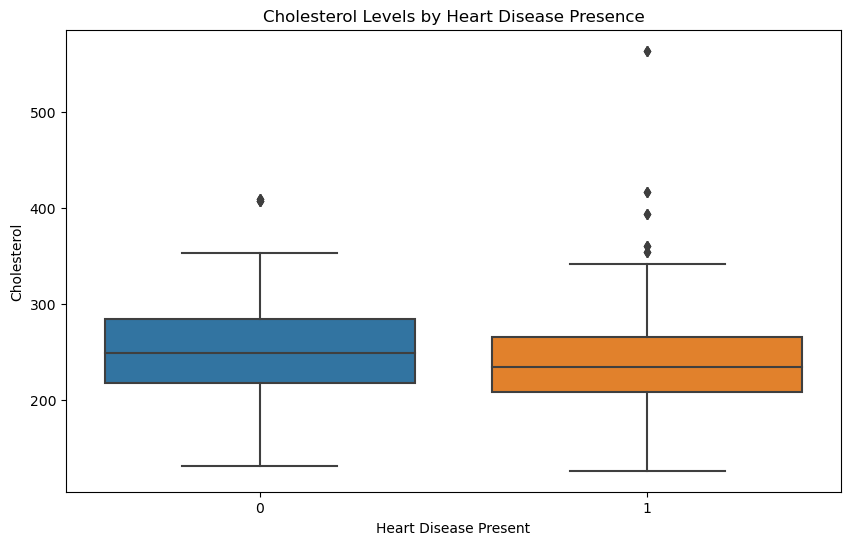

In [16]:
# Boxplot of cholesterol by target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=data)
plt.title('Cholesterol Levels by Heart Disease Presence')
plt.xlabel('Heart Disease Present')
plt.ylabel('Cholesterol')
plt.show()

⚡`*The individual points beyond the whiskers are outliers, indicating cholesterol levels that are significantly higher or lower than the rest of the data.*`

# 4. Data Preprocessing 🤖

**4.1 Handle missing values**

In [17]:
# Check for missing values
print(data.isnull().sum())

# If there are missing values, we'll use SimpleImputer
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


- ⚡ **Numeric Transformer**:

    - _**Imputer**_: Fills missing values in numeric features with the median value.

    - _**Scaler**_: Standardizes the numeric features by removing the mean and scaling to unit variance.
    
- ⚡ **Categorical Transformer**:

    - Imputer: Fills missing values in categorical features with the most frequent value.
    
- ⚡ **Preprocessor**: This combines the numeric and categorical transformers into a single preprocessor. It applies the numeric transformer to the numeric features and the categorical transformer to the categorical features.

**4.2 Feature scaling and encoding**

In [18]:
# Our preprocessor already includes StandardScaler for numeric features
# Categorical features are already encoded as integers, so we don't need further encoding

**4.3 Split features and target**

In [19]:
X = data.drop('target', axis=1)
y = data['target']

print("Features:", X.columns)
print("Target variable:", y.name)

Features: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
Target variable: target


**4.4 Split data into training and testing sets**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (820, 13)
Testing set shape: (205, 13)


# 5. Build and train the Logistic Regression model 🤖

In [21]:
# Create a pipeline with preprocessor and logistic regression
logistic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Define parameters for grid search
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_

Best parameters: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best cross-validation score: 0.9115305330993158


---

🌟 _**`Hyperparameters are the global parameters that define the model’s structure and learning process, such as the choice of model, type of regularization, and optimization algorithm. By providing a range of suitable options for these hyperparameters, we can use GridSearchCV to automate the process of finding the best combination. It does this by launching multiple parallel processes, each testing a different combination, and selecting the one with the highest cross-validation score.`**_

---

⚡ **Pipeline**: to streamline your machine learning workflow by chaining together multiple processing steps. It ensures that all steps are executed in sequence and makes your code cleaner and more manageable.

⚡**Grid Search Parameters Explanation:**

    - C: Regularization strength. Smaller values specify stronger regularization.
    
    - Penalty: Type of regularization (‘l1’ for Lasso, ‘l2’ for Ridge).
    
    - Solver: Algorithm to use for optimization.

⚡**Performing Grid Search with Cross-Validation:**

    - GridSearchCV: Searches for the best combination of hyperparameters.
    
    - cv=5: Uses 5-fold cross-validation.
    
    - scoring=‘roc_auc’: Evaluates models based on the ROC AUC score.
    
    - n_jobs=-1: Uses all available CPU cores for parallel processing

⚡**Printing Best Parameters and Score:**
    
    - best_params_: Shows the best combination of hyperparameters found.
    
    - best_score_: Shows the best cross-validation score achieved.

⚡**Using the Best Model**: `best_model = grid_search.best_estimator_`


⚡**In essence**: 

    1. Pipeline: Combines preprocessing and modeling steps.
    
    2. Grid Search: Finds the best hyperparameters using cross-validation.
    
    3. Best Model: Uses the best combination of hyperparameters for predictions.
    
    
🎉 We got a fantastic cross-validation score of 91.15% !

# 6. Make predictions 🤖

In [23]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

`predict_proba` returns an array with probabilities for both classes (0 and 1). By selecting `[:, 1]`, you get the probabilities for the positive class.

`y_pred_proba` will contain the predicted probabilities of each sample belonging to the positive class.

# 7. Model Evaluation 🤖

**7.1 Confusion Matrix**

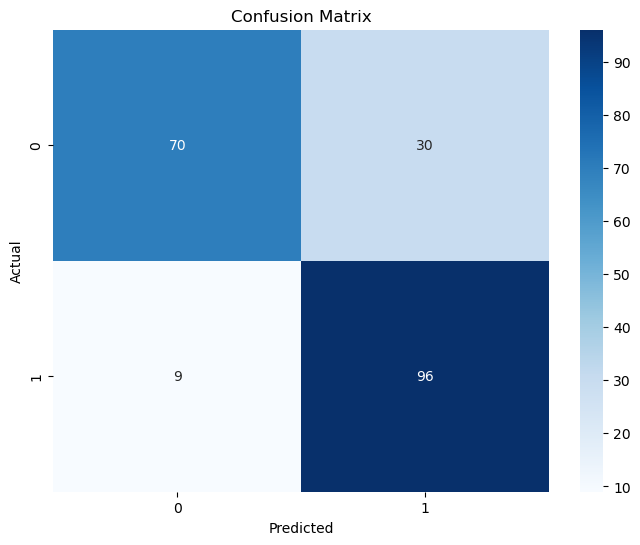

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Interpretation:**

⚡ High True Positives: The model is good at correctly identifying both classes. 

⚡ False Positives and Negatives: There are some misclassifications, but the numbers are relatively low compared to the true positives.

**7.2 Classification Report**

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



🧾 _*`For class 0, the F1-score is 0.78, indicating good performance but with room for improvement in recall.`*_

🧾 _*`Overall, the Avg F1-Score is 0.81 & macro avg between the two classes is 0.8 which indicates good performance`*_

**7.3 ROC Curve and AUC**

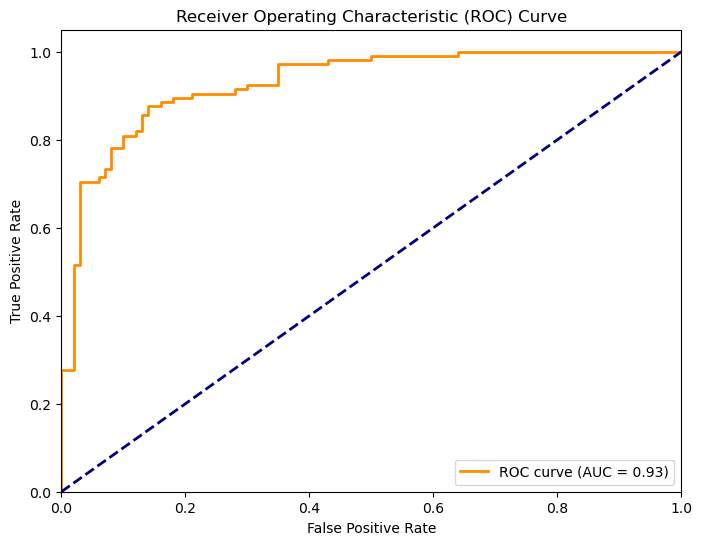

In [27]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

📈 `The ROC curve is pulled from the top left which is an indication of good performance at indicating true positives, also the Area Under the Curve is 0.93 which is a very good result.`

# 8. Feature Importance 🤖

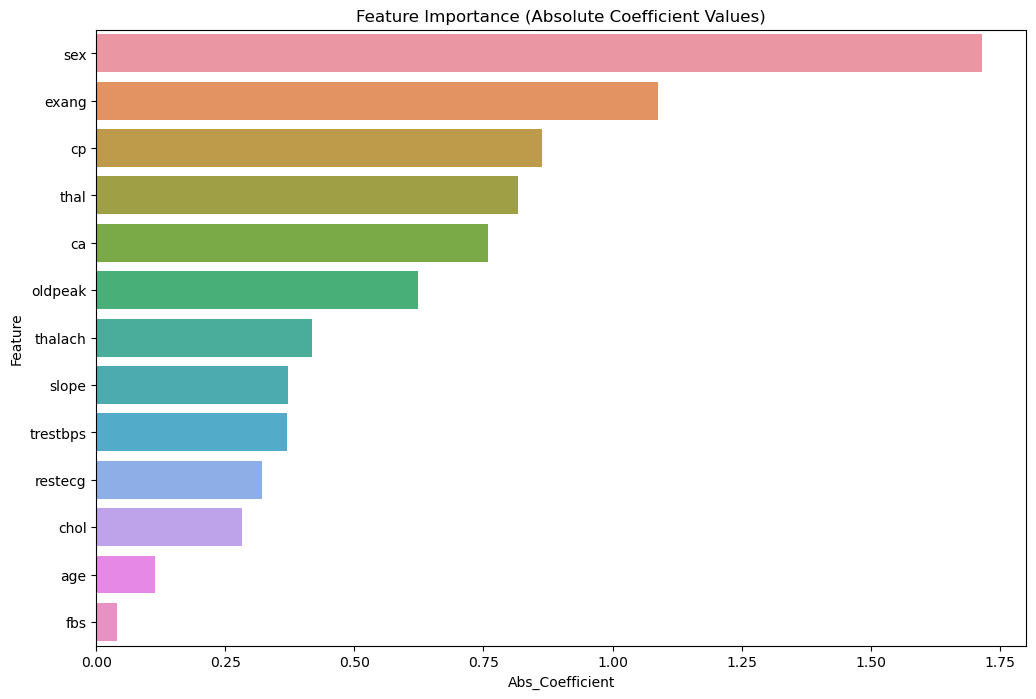

     Feature  Coefficient  Abs_Coefficient
7        sex    -1.715586         1.715586
11     exang    -1.088119         1.088119
8         cp     0.864018         0.864018
12      thal    -0.817485         0.817485
6         ca    -0.758467         0.758467
4    oldpeak    -0.622678         0.622678
3    thalach     0.417730         0.417730
5      slope     0.370584         0.370584
1   trestbps    -0.369643         0.369643
10   restecg     0.320080         0.320080
2       chol    -0.281343         0.281343
0        age    -0.112869         0.112869
9        fbs    -0.039375         0.039375


In [28]:
# Extract feature names after preprocessing
feature_names = (numeric_features + 
                 best_model.named_steps['preprocessor']
                 .named_transformers_['cat']
                 .named_steps['imputer']
                 .get_feature_names_out(categorical_features).tolist())

# Get coefficients
coefficients = best_model.named_steps['classifier'].coef_[0]

# Create DataFrame of feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.show()

print(feature_importance)

⚡ `This code helps us understand which features are most important in our logistic regression model by examining the coefficients. The higher the absolute value of a coefficient, the more important the feature is in predicting the target variable.`

> You can also plot the S-shaped logistic curves for a feature or two for further exploration...

[end]